## 0. An end to end scikit learn worlflow

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# Create X and Y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [37]:
#Choosing the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
#Fit the model to the Training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
clf.fit(x_train,y_train);

In [40]:
#make a prediction
y_pred=clf.predict(x_test)

In [41]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
y_test

58     1
195    0
227    0
67     1
243    0
      ..
51     1
136    1
217    0
201    0
155    1
Name: target, Length: 61, dtype: int64

In [43]:
#Evaluate the model
clf.score(x_train,y_train)

1.0

In [44]:
clf.score(x_test,y_test)

0.819672131147541

In [45]:
 from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [47]:
confusion_matrix(y_test,y_pred)

array([[24,  6],
       [ 5, 26]], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)

0.819672131147541

In [49]:
#Impove a Model
#Try different values of n_estimators
np.random.seed(1)
for i in range(10,100,5):
    print(f"Evaluation Model with n_estimatos equals {i} ")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model score is {clf.score(x_test,y_test)*100} %")

Evaluation Model with n_estimatos equals 10 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 15 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 20 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 25 
Model score is 80.32786885245902 %
Evaluation Model with n_estimatos equals 30 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 35 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 40 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 45 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 50 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 55 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 60 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 65 
Model score is 81.9672131147541 %
Evaluation Model with n_estimatos equals 70 
Model 

In [50]:
#Save the model
import pickle
pickle.dump(clf,open("random_forest_model1.pkl","wb"))

In [51]:
loaded_model=pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.819672131147541

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Getting the data ready to use with machine learning

1* Split data into features and labels (usually x and y)

2* Filling(imputing) or disregarding missing values

3* Converting non numerical values to numerical values(feature encoding)

In [53]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [55]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [57]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [58]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 1.1 Making sure it's all numerical

In [59]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [60]:
len(car_sales)

1000

In [61]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [62]:
#Split into x&y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [63]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [64]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [65]:
#Split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
#Build machine learning model
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

In [67]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(x)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [68]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [69]:
dummi=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummi

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [70]:
np.random.seed(2)
x_train,x_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.3)
model.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
model.score(x_test,y_test)

0.24246161405829503

## 1.2 Missing Values
1.Fill the missing values (imputation)

2.Remove the sample points with missing data

In [72]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [73]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [74]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(x)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Option1: Fill missing data with Pandas

In [76]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13016\249754471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13016\249754471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [77]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [78]:
#Remove rows with missing data
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [79]:
len(car_sales_missing)

950

In [80]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(x)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [82]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


## Fill missing values with Scikit-Learn

In [83]:
car_sales=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [84]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [85]:
car_sales.dropna(subset=["Price"],inplace=True)
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [86]:
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [87]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [88]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [89]:
# Fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]
# Create an imputer to fill the m issing values
imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_imputer",door_imputer,door_features),("num_imputer",num_imputer,num_features)])
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [90]:
car_sales_new=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

In [91]:
car_sales_new

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [92]:
car_sales_new.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_new)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [94]:
np.random.seed(22)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.23507684463225975

## Pick the right machine learning model for regressor problem

In [95]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [96]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [97]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [98]:
len(housing_df)

20640

In [99]:
housing_df["Target"]=housing["target"]

In [100]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [101]:
np.random.seed(22)
from sklearn.linear_model import Ridge
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6094312801531332

In [102]:
from sklearn.ensemble import RandomForestRegressor
andr=RandomForestRegressor()
andr.fit(x_train,y_train)
andr.score(x_test,y_test)

0.8140275317259258

## Pick the right machine learning model for Classification problem

In [103]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [104]:
from sklearn.svm import LinearSVC
np.random.seed(9)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearSVC()
clf.fit(x_train,y_train)

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [105]:
clf.score(x_test,y_test)

0.47540983606557374

In [106]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8032786885245902

## Fit the model and use it to make predictions
#Fitting the data

In [107]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7540983606557377

#Making prediction with data
2 ways
1. predict()
2. predict_proba()

In [108]:
model.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [109]:
np.array(y_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [110]:
y_preds=model.predict(x_test)
np.mean(y_preds==y_test)

0.7540983606557377

In [111]:
model.predict_proba(x_test)

array([[0.07, 0.93],
       [0.2 , 0.8 ],
       [0.52, 0.48],
       [0.33, 0.67],
       [0.7 , 0.3 ],
       [0.25, 0.75],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.12, 0.88],
       [0.32, 0.68],
       [0.79, 0.21],
       [0.63, 0.37],
       [0.95, 0.05],
       [0.13, 0.87],
       [0.39, 0.61],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.58, 0.42],
       [0.96, 0.04],
       [0.05, 0.95],
       [0.95, 0.05],
       [0.53, 0.47],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.27, 0.73],
       [0.5 , 0.5 ],
       [0.64, 0.36],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.64, 0.36],
       [0.22, 0.78],
       [0.55, 0.45],
       [0.24, 0.76],
       [0.13, 0.87],
       [0.73, 0.27],
       [0.91, 0.09],
       [0.04, 0.96],
       [0.68, 0.32],
       [0.61, 0.39],
       [0.33, 0.67],
       [0.56, 0.44],
       [0.26, 0.74],
       [0.7 ,

In [112]:
model.predict([[52,1,1,155,224,0,1,135,1,1.2,1,0,1],[52,0,0,155,224,1,0,135,0,1.5,0,1,0]])

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int64)

In [113]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [114]:
from sklearn.ensemble import RandomForestRegressor
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8079712627516917

In [115]:
y_preds=model.predict(x_test)

In [116]:
y_preds[:10]

array([3.4615101, 1.3287101, 1.12767  , 4.6638158, 2.2703701, 2.02158  ,
       1.86789  , 2.74578  , 1.94514  , 3.35187  ])

In [117]:
np.array(y_test)

array([3.204, 1.214, 1.   , ..., 1.319, 1.708, 1.25 ])

In [118]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32339437870639554

In [119]:
model.predict([[2.3252,410.0,4.27,3.80,222.0,5.56,12.88,-128.23]])

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.6720101])

## Evaluation a Machine Learning Model

#Evaluation with the score() model

In [120]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
model.score(x_test,y_test)

0.8032786885245902

In [122]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(9)
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
model.score(x_test,y_test)

0.8132159574953577

Evaluation of a model using scoring parameter

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [125]:
cross_val_score(model,x,y)

array([0.85245902, 0.90163934, 0.83606557, 0.81666667, 0.76666667])

In [126]:
cross_val_score(model,x,y,cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.9       ,
       0.86666667, 0.76666667, 0.83333333, 0.73333333, 0.8       ])

In [127]:
clf_mean=np.mean(cross_val_score(model,x,y,cv=10))

In [128]:
model.score(x_test,y_test)

0.8032786885245902

In [129]:
clf_mean

0.8181720430107526

# Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()
cross_val_score(clf,x,y,cv=5)

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

#Area under the receiver operating characteristic (ROC/AUC) curve
    
* ROC is comparison of a model's true positive rate(tpr) versus false positive rate(fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [131]:
from sklearn.metrics import roc_curve
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)
y_probs=clf.predict_proba(x_test)

In [132]:
y_probs

array([[0.02, 0.98],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.5 , 0.5 ],
       [0.95, 0.05],
       [0.41, 0.59],
       [0.95, 0.05],
       [0.2 , 0.8 ],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.7 , 0.3 ],
       [0.96, 0.04],
       [0.07, 0.93],
       [0.79, 0.21],
       [0.1 , 0.9 ],
       [0.45, 0.55],
       [0.77, 0.23],
       [0.13, 0.87],
       [0.35, 0.65],
       [0.22, 0.78],
       [0.17, 0.83],
       [0.87, 0.13],
       [0.37, 0.63],
       [0.27, 0.73],
       [0.68, 0.32],
       [0.07, 0.93],
       [0.26, 0.74],
       [0.2 , 0.8 ],
       [0.64, 0.36],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.59, 0.41],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.18, 0.82],
       [0.61, 0.39],
       [0.39, 0.61],
       [0.84, 0.16],
       [0.68, 0.32],
       [0.86, 0.14],
       [0.91, 0.09],
       [0.03, 0.97],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.9 , 0.1 ],
       [0.53, 0.47],
       [0.36, 0.64],
       [0.34,

In [133]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.98, 0.76, 0.77, 0.5 , 0.05, 0.59, 0.05, 0.8 , 0.08, 1.  , 0.3 ,
       0.04, 0.93, 0.21, 0.9 , 0.55, 0.23, 0.87, 0.65, 0.78, 0.83, 0.13,
       0.63, 0.73, 0.32, 0.93, 0.74, 0.8 , 0.36, 0.57, 0.16, 0.41, 0.85,
       0.6 , 0.82, 0.39, 0.61, 0.16, 0.32, 0.14, 0.09, 0.97, 0.05, 0.95,
       0.1 , 0.47, 0.64, 0.66, 0.87, 0.96, 0.75, 0.02, 0.18, 0.08, 0.3 ,
       0.44, 0.97, 0.99, 0.95, 0.2 , 0.06])

In [134]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [135]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.07142857, 0.07142857, 0.10714286,
       0.10714286, 0.17857143, 0.17857143, 0.28571429, 0.28571429,
       0.32142857, 0.39285714, 0.46428571, 0.46428571, 0.5       ,
       0.57142857, 0.71428571, 0.78571429, 0.82142857, 0.92857143,
       1.        ])

In [136]:
tpr

array([0.        , 0.03030303, 0.09090909, 0.15151515, 0.18181818,
       0.24242424, 0.27272727, 0.3030303 , 0.36363636, 0.45454545,
       0.51515152, 0.57575758, 0.57575758, 0.63636364, 0.63636364,
       0.6969697 , 0.6969697 , 0.90909091, 0.90909091, 0.93939394,
       0.96969697, 0.96969697, 0.96969697, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [137]:
thresholds

array([ inf, 1.  , 0.98, 0.97, 0.96, 0.95, 0.93, 0.9 , 0.87, 0.82, 0.8 ,
       0.77, 0.76, 0.74, 0.73, 0.65, 0.63, 0.47, 0.39, 0.36, 0.32, 0.3 ,
       0.21, 0.2 , 0.18, 0.16, 0.09, 0.08, 0.06, 0.05, 0.02])

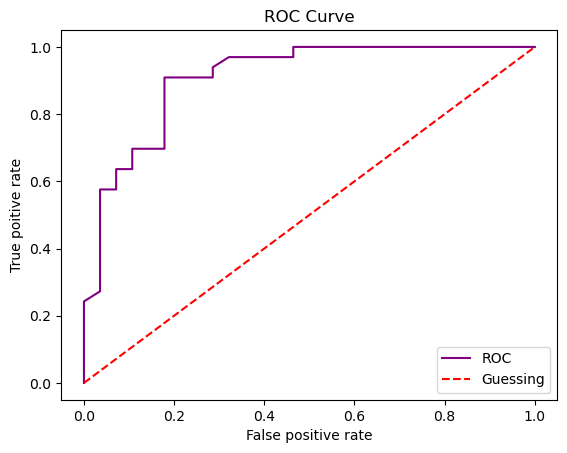

In [138]:
import matplotlib.pyplot as plt
def roc_curves(fpr,tpr):
    '''
    Plots a ROC curve
    '''
    plt.plot(fpr,tpr,color="purple",label="ROC")
    plt.plot([0,1],[0,1],color="red",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True poitive rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
roc_curves(fpr,tpr)

In [139]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.908008658008658

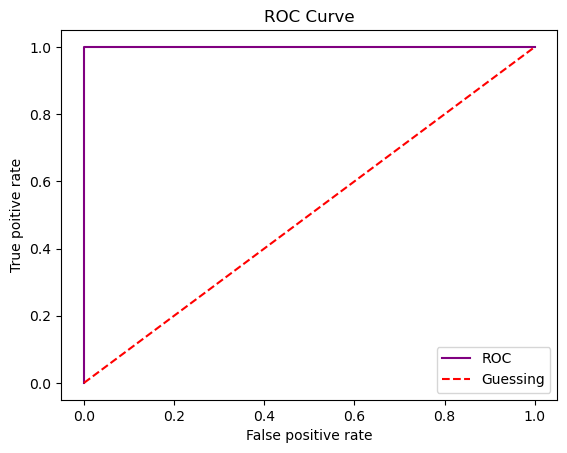

In [140]:
#Plotting a perfect roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
roc_curves(fpr,tpr)

In [141]:
roc_auc_score(y_test,y_test)

1.0

In [142]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[23,  5],
       [ 5, 28]], dtype=int64)

In [143]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,23,5
1,5,28


In [144]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



<Axes: >

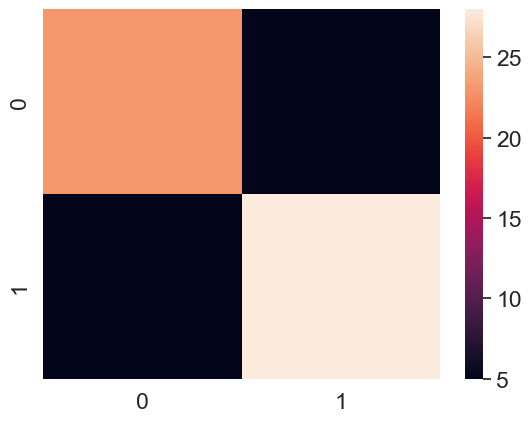

In [145]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix)

In [146]:
import sklearn
sklearn.__version__

'1.4.2'

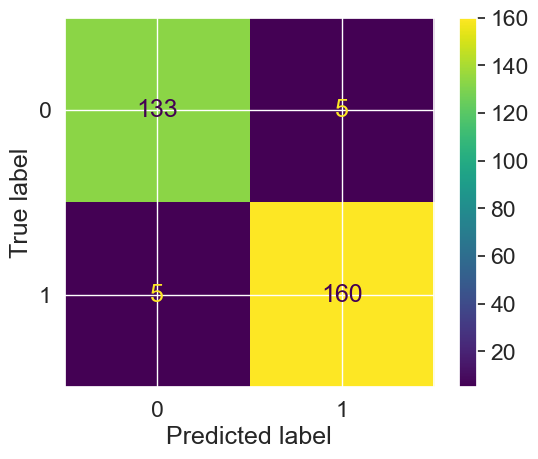

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

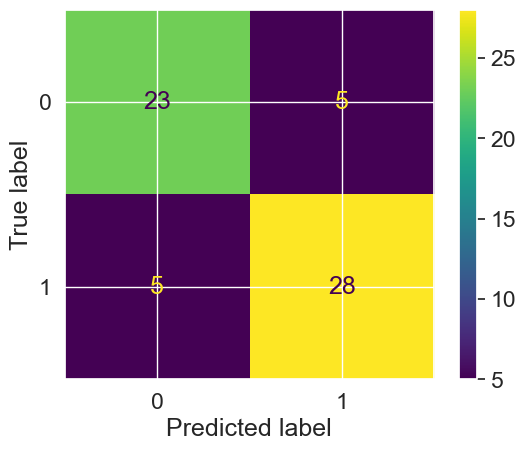

In [148]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [150]:
# Importance of precision and recall
disease_true=np.zeros(10000)
disease_true[0]=1
disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True))

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# Regression model evaluation metrics
 We are going to cover the following
 * R^2 / coefficient of determination
 * Mean Absolute Error (MAE)
 * Mean Squared Error (MSE)

In [151]:
from sklearn.ensemble import RandomForestRegressor
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [152]:
model.score(x_test,y_test)

0.8083297798760866

In [153]:
y_test.mean()

2.0686790188953488

In [154]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [155]:
y_test_mean

array([2.06867902, 2.06867902, 2.06867902, ..., 2.06867902, 2.06867902,
       2.06867902])

In [156]:
r2_score(y_test,y_test_mean)

0.0

In [157]:
r2_score(y_test,y_test)

1.0

#MAE is average of absolute differences between predictions and actual values

In [158]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)

In [159]:
mae

0.3316185421753878

In [160]:
df=pd.DataFrame({"actual":y_test,
                 "predicted":y_preds})
df

,actual,predicted
9828,2.900,3.266141
9321,2.875,2.179690
5523,3.160,2.116460
4277,2.111,2.059080
11420,3.167,3.337050
...,...,...
15712,5.000,4.550105
12591,2.516,3.202301
17909,2.476,3.130220
3312,1.142,1.887430


In [161]:
df["differences"]=abs(df["actual"]-df["predicted"])

In [162]:
df

,actual,predicted,differences
9828,2.900,3.266141,0.366141
9321,2.875,2.179690,0.695310
5523,3.160,2.116460,1.043540
4277,2.111,2.059080,0.051920
11420,3.167,3.337050,0.170050
...,...,...,...
15712,5.000,4.550105,0.449895
12591,2.516,3.202301,0.686301
17909,2.476,3.130220,0.654220
3312,1.142,1.887430,0.745430


In [163]:
from sklearn.metrics import mean_squared_error
#MSE is mean of square of errors between actual and predicted values

In [164]:
mse=mean_squared_error(y_test,y_preds)
mse

0.2579010210739503

In [165]:
df["Square Differences"]=np.square(df["differences"])
df

,actual,predicted,differences,Square Differences
9828,2.900,3.266141,0.366141,0.134059
9321,2.875,2.179690,0.695310,0.483456
5523,3.160,2.116460,1.043540,1.088976
4277,2.111,2.059080,0.051920,0.002696
11420,3.167,3.337050,0.170050,0.028917
...,...,...,...,...
15712,5.000,4.550105,0.449895,0.202406
12591,2.516,3.202301,0.686301,0.471009
17909,2.476,3.130220,0.654220,0.428004
3312,1.142,1.887430,0.745430,0.555666


## using scoring() parameter

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier(n_estimators=100)

In [167]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [168]:
avg=np.mean(cv_acc)*100
print("Cross validation accuracy is " + str(avg))

Cross validation accuracy is 82.48087431693989


In [169]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [170]:
avg=np.mean(cv_acc)*100
print("Cross validation accuracy is " + str(avg))

Cross validation accuracy is 82.48087431693989


In [171]:
np.random.seed(42)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [172]:
avg=np.mean(cv_precision)*100
print("Cross validation accuracy is " + str(avg))

Cross validation accuracy is 83.29547346025925


In [173]:
np.random.seed(42)
cv_rec=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_rec

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [174]:
avg=np.mean(cv_rec)*100
print("Cross validation accuracy is " + str(avg))

Cross validation accuracy is 85.45454545454545


#Scoring parameter for a regression problem

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
model=RandomForestRegressor()

In [176]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [177]:
cv_r2.mean()

0.6520824166120266

In [178]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2,cv_r2.mean()

(array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183]),
 0.6520824166120266)

In [179]:
np.random.seed(42)
cv_mse=cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
cv_mse,cv_mse.mean()

(array([-0.51017222, -0.33368897, -0.5403795 ]), -0.46141356443710196)

In [180]:
np.random.seed(42)
cv_mse=cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error")
cv_mse,cv_mse.mean()

(array([-0.51754565, -0.42678172, -0.50640477]), -0.4835773816036823)

## Using different evaluation metrics as scikit learn functions

In [181]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
print("Accuracy Score is "+ str(accuracy_score(y_test,y_preds)*100)+" %")

Accuracy Score is 85.24590163934425 %


In [182]:
print("Precision Score is "+ str(precision_score(y_test,y_preds)*100)+" %")

Precision Score is 84.84848484848484 %


In [183]:
print("Recall Score is "+ str(recall_score(y_test,y_preds)*100)+" %")

Recall Score is 87.5 %


In [184]:
print("F1 Score is "+ str(f1_score(y_test,y_preds)*100)+" %")

F1 Score is 86.15384615384616 %


In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
x=housing_df.drop("Target",axis=1)
y=housing_df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print("R2 Score is "+ str(r2_score(y_test,y_preds)*100)+" %")

R2 Score is 80.95334567787089 %


In [186]:
print("Mean_absolute_error Score is "+ str(mean_absolute_error(y_test,y_preds)*100)+" %")

Mean_absolute_error Score is 32.678441937984516 %


In [187]:
print("Mean_squared_error Score is "+ str(mean_squared_error(y_test,y_preds)*100)+" %")

Mean_squared_error Score is 25.996890327609524 %


## Impoving a Model
* First predictions are called base predictions
* First model are called base model

In [188]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to adjust the following
* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimaotrs'

In [193]:
def evaluate_pred(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true vs y_preds on a classification model
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "f1":round(f1,2),
                 "recall":round(recall,2)
                 }
    print(f"accuracy: {accuracy*100:.2f}%")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    print(f"precision: {precision:.2f}")
    return metric_dict

In [194]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
train_split=round(0.7*len(heart_disease_shuffled))
validation_split=round(train_split+0.15*len(heart_disease_shuffled))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:validation_split],y[train_split:validation_split]
x_test,y_test=x[validation_split:],y[validation_split:]
len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [195]:
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [197]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_valid)

In [198]:
baseline_metrics=evaluate_pred(y_valid,y_pred)
baseline_metrics

accuracy: 82.22%
recall: 0.88
f1: 0.85
precision: 0.81


{'accuracy': 0.82, 'precision': 0.81, 'f1': 0.85, 'recall': 0.88}

In [222]:
## Different classifier with adjusted hyperparameters
clf_2=RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train,y_train)
y_pred=clf_2.predict(x_valid)
clf_2_metrics=evaluate_pred(y_valid,y_pred)
clf_2_metrics

accuracy: 91.11%
recall: 0.92
f1: 0.92
precision: 0.92


{'accuracy': 0.91, 'precision': 0.92, 'f1': 0.92, 'recall': 0.92}

In [203]:
clf_3=RandomForestClassifier(max_depth=10)
clf_3.fit(x_train,y_train)
y_pred=clf_3.predict(x_valid)
baseline_metrics=evaluate_pred(y_valid,y_pred)
baseline_metrics

accuracy: 84.44%
recall: 0.88
f1: 0.86
precision: 0.85


{'accuracy': 0.84, 'precision': 0.85, 'f1': 0.86, 'recall': 0.88}

#Hyperparameter tuning using RandomisedSearchCV

In [208]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]
      }
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\sample_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [210]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [213]:
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_pred(y_test,rs_y_preds)

accuracy: 81.97%
recall: 0.86
f1: 0.81
precision: 0.77


## HyperParameter tuning using GridSearchCV

In [214]:
grid_2={"n_estimators":[10,100,200],
      "max_depth":[None,5,10],
      "max_features":["auto","sqrt"],
      "min_samples_split":[4,6],
      "min_samples_leaf":[1,2]
      }

In [218]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_es

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [219]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [220]:
gs_y_pred=gs_clf.predict(x_test)
gs_metrics=evaluate_pred(y_test,gs_y_pred)

accuracy: 81.97%
recall: 0.86
f1: 0.81
precision: 0.77


<Axes: >

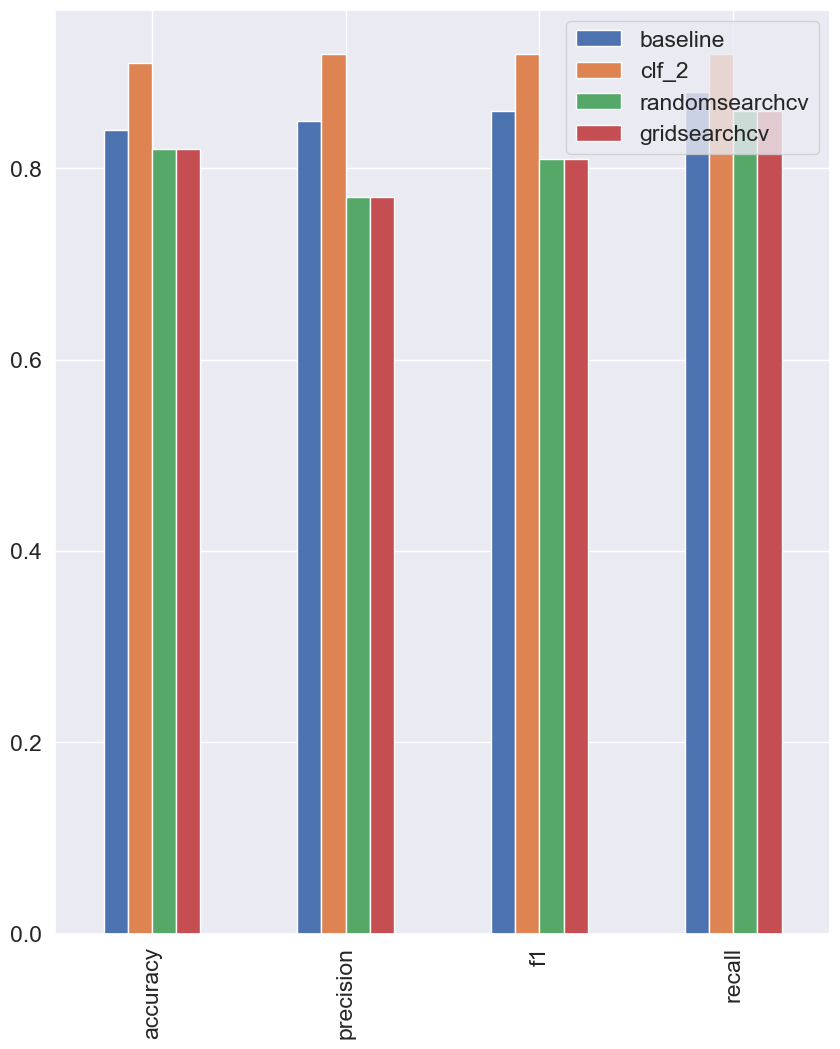

In [226]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "randomsearchcv":rs_metrics,
                              "gridsearchcv":gs_metrics})
compare_metrics.plot.bar(figsize=(10,12))

## Saving and loading a trained machine learning model

In [227]:
import pickle
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [228]:
loaded_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [230]:
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
pickle_y_preds=loaded_model.predict(x_test)
metric=evaluate_pred(y_test,pickle_y_preds)

accuracy: 95.08%
recall: 0.97
f1: 0.96
precision: 0.95


In [231]:
from joblib import dump, load
dump(gs_clf,filename="gs_random_model.joblib")

['gs_random_model.joblib']

In [232]:
load_model=load(filename="gs_random_model.joblib")

In [233]:
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
joblib_y_preds=load_model.predict(x_test)
metric=evaluate_pred(y_test,joblib_y_preds)

accuracy: 93.44%
recall: 0.94
f1: 0.94
precision: 0.94


## Putting it all together

In [236]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [237]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [238]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Steps to do
1. Fill the missing data
2. Convert the data to numbers
3. Train a model

In [245]:
#Getting Data Ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

#Import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transfoemer pipeline
categorical_features=["Make","Colour"]
door_features=["Doors"]
numeric_features=["Odometer (KM)"]
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

#Setup the preprocessing steps(filling missing values , converting to numbers)
preprocessor=ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_features),
                                            ("door",door_transformer,door_features),
                                            ("num",numeric_transformer,numeric_features)])

#Creating preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor())])

#Split data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [253]:
##Using gridsearchcv
from sklearn.model_selection import GridSearchCV
pipe_grid={"preprocessor__num__imputer__strategy":["mean","median"],
           "model__n_estimators":[100,1000],
           "model__max_depth":[None,5],
           "model__max_features":["auto","sqrt"],
           "model__min_samples_split":[2,4]}
gs_model=GridSearchCV(estimator=model,
                          param_grid=pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)
gs_model.score(x_test,y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    

0.2848784564026805